In [7]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs') 
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [8]:
df_DA_US = df[(df['job_title_short']== 'Data Analyst') & (df['job_country']== 'United States')].copy()
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])



<Axes: >

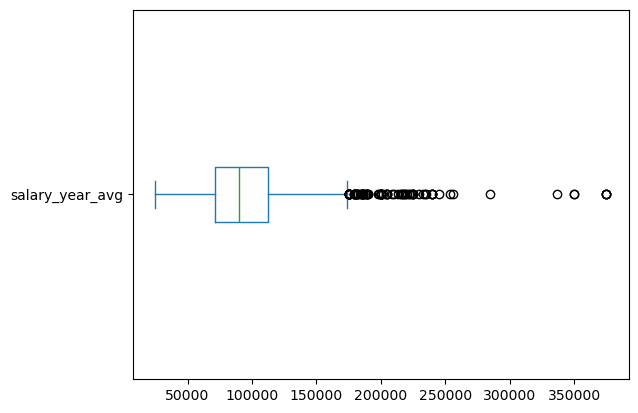

In [9]:
df_DA_US['salary_year_avg'].plot(kind='box',vert=False)

C:\Users\keerthi\AppData\Local\Temp\ipykernel_6300\3561913880.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


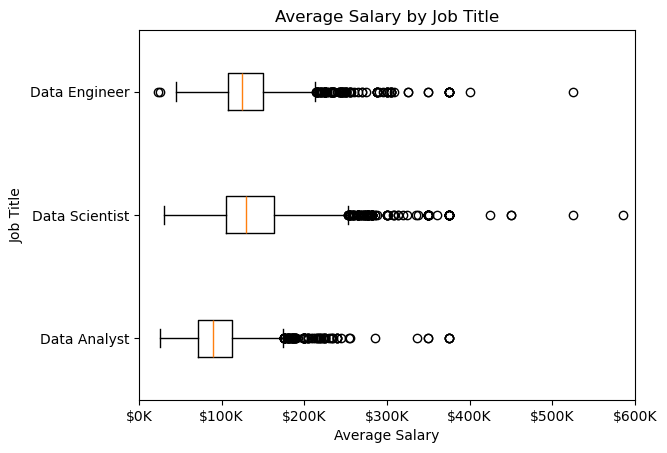

In [19]:
job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer',]
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country']== 'United States')].copy()
df_US = df_US.dropna(subset=['salary_year_avg'])
job_list = [df_US[df_US['job_title_short'] == job_titles]['salary_year_avg'] for job_titles in job_titles]

plt.boxplot(job_list, labels=job_titles, vert=False)
plt.xlabel('Average Salary')
plt.ylabel('Job Title')
plt.title('Average Salary by Job Title')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f'${int(x/1000)}K'))
plt.xlim(0,600000)
plt.show()
